In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df = df.drop(columns = 'petal_width',  axis = 1)
df = df.drop(columns = 'sepal_width', axis = 1)
df = df.drop(columns = 'sepal_length', axis = 1)
x = df.drop(columns = 'species', axis = 1)
y = df['species']

SPLITTING THE DATASET INTO TRAINIG DATA AND TEST DATA

In [4]:

from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size = 0.2, random_state = 2)

FEATURE SCALING

In [5]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [6]:
cls = KNeighborsClassifier(n_neighbors=5)
cls.fit(x_train,y_train)

KNeighborsClassifier()

In [7]:
y_pred = cls.predict(x_test)
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred)
print(result) # for k = 3 (0.825), k = 5 (0.8333), k = 7 (0.8166) .... accuracy score for different k  values 

0.8333333333333334


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[36  0  0]
 [ 3 39  0]
 [ 0 17 25]]


c:\Users\Ratul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


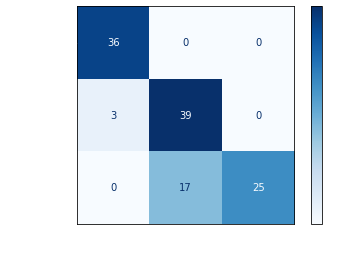

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

color = 'white'
matrix = plot_confusion_matrix(cls, x_test, y_test, cmap = plt.cm.Blues)
plt.xlabel('Preddicted label', color = color)
plt.ylabel("True label", color = color)
plt.gcf().axes[0].tick_params(colors = color)
plt.gcf().axes[1].tick_params(colors = color)
plt.show()